In [1]:
import glob
from natsort import natsorted

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_colwidth', -1)

from IPython.display import display

In [4]:
### 
df = pd.read_csv('data/2.hosobenhan.csv',
                         sep=';', 
                         error_bad_lines=False, 
                         warn_bad_lines=False)
#Sample for running
# df = df.sample(1000)

selected  = [
    'hosobenhanid',
    'patientid',
    'chandoanravien_code',
    'chandoanravien',
    'patientname',
#     'patientcode',
    'gioitinhcode',
    'nghenghiepcode',
    'noilamviec',
    'hc_xacode', 
    'hc_huyencode',
    'hc_tinhcode',
    'hc_quocgiacode',
#     'hc_xaname',
#     'hc_huyenname',
#     'hc_tinhname',
#     'hc_quocgianame',
]

renamed  = {
    'hosobenhanid':'record_id',
    'patientid':'patient_id',
    'chandoanravien_code':'diagnosis_icd10_out',
    'chandoanravien':'diagnosis_vn_out',
    'patientname':'patient_name',
#     'patientcode',
    'gioitinhcode':'patient_gender',
    'nghenghiepcode':'patient_occupation',
    'noilamviec':'patient_workplace',
    'hc_xacode':'patient_ward_code', 
    'hc_huyencode':'patient_district_code',
    'hc_tinhcode':'patient_city_code',
    'hc_quocgiacode':'patient_country_code',
}


# Select desired feature
df = df[selected]
df.rename(columns=renamed, inplace=True)

# Remove dot in icd10
df['diagnosis_icd10_out'] = df['diagnosis_icd10_out'].astype('str').apply(lambda x: x.split('.')[0])

# object string to categorical
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
# display(df.dtypes)
# display(df['diagnosis_icd10_out'].cat.codes)


# categorical to numerical
# df['diagnosis_icd10_out'] = df['diagnosis_icd10_out'].cat.codes
# display(df.dtypes)
# df[df.select_dtypes(['category']).columns] = df.select_dtypes(['category']).apply(lambda x: x.cat.codes)
# display(df.dtypes)


# Remove NAN
df.dropna(inplace=True)

# Normalize
# df = (df-df.mean())/df.std()


display(df.columns)
display(len(df.columns))
display(df)

df.to_csv('Clean_02_individual_record.csv')
display(df.dtypes)

Index(['record_id', 'patient_id', 'diagnosis_icd10_out', 'diagnosis_vn_out',
       'patient_name', 'patient_gender', 'patient_occupation',
       'patient_workplace', 'patient_ward_code', 'patient_district_code',
       'patient_city_code', 'patient_country_code'],
      dtype='object')

12

,record_id,patient_id,diagnosis_icd10_out,diagnosis_vn_out,patient_name,patient_gender,patient_occupation,patient_workplace,patient_ward_code,patient_district_code,patient_city_code,patient_country_code
10,636511,242068.0,J20,Viêm phế quản cấp,NGUYỄN CHÂU MINH ANH,1.0,1,Xã Đức Lập Hạ - Đức Hòa,10.0,8.0,80.0,VN
16,2085471,424806.0,S00,CHẤN THƯƠNG ĐẦU,LÊ THỊ HOÀNG,2.0,99,"Tổ 1, Phước An, Xã Phước Thạnh, Huyện Củ Chi, Thành phố Hồ Chí Minh",11.0,20.0,79.0,VN
20,615856,234743.0,T15,Vật lạ trong giác mạc,YU CHANG HUA,1.0,12,"Lô 1- 10, KCX Linh Trung III, Trảng Bàng, Tây Ninh",0.0,9.0,72.0,CN
22,636513,201642.0,L50,"Mày đay dị ứng/nhiễm giun lươn, nhiễm giun đũa chó /theo dõi nhiễm toxoplasma/theo dõi tăng men gan / Theo dõi nhiễm giun đũa",TRẦN THỊ HƯƠNG,2.0,13,"Đức Lập Hạ, Đức Hòa, Long An",10.0,8.0,80.0,VN
24,642207,243841.0,K29,Thiếu máu - cặn vôi hai thận - Viêm dạ dày - viêm đại trực tràng - trĩ nội độ II - III,LÊ VĂN HUÂN,1.0,13,"Mỹ Hạnh Nam, Đức Hòa, Long An",16.0,8.0,80.0,VN
25,652751,205588.0,I05,Van 2 lá cơ học - Kẹt van 2 lá cơ học điều trị tiêu sợi huyết thành công (2012) - Tạo hình van 2 lá (8/2012)/ Viêm dạ dày,HÀ THỊ CHIẾN,2.0,4,Công ty TNHH May Thêu M.D.K_C1A,7.0,16.0,38.0,VN
28,2288775,165552.0,Z24,Tiêm chủng phòng viêm gan virus B,NGUYỄN THỊ PHƯƠNG LOAN,2.0,8,"Gia Bình, Trảng Bàng, Tây Ninh",6.0,9.0,72.0,VN
37,888183,157822.0,J30,Viêm mũi dị ứng khác,PHAN NGUYỄN PHƯỚC THỊNH,1.0,2,"82/3M, Xuân Thới Đông 3, Hóc Môn_Lớp 8/1",9.0,21.0,79.0,VN
57,616453,235037.0,K29,Viêm dạ dày hp (+),LÊ NGUYÊN TÚ,1.0,5,"Ninh Thuận, Xã Bàu Năng, Huyện Dương Minh Châu, Tỉnh Tây Ninh",6.0,4.0,72.0,VN
62,648018,241738.0,N39,Suy tim sung huyết - Hở van 2 lá - BTTMCB - viêm dạ dày,NGUYỄN THỊ LỤM,2.0,3,"79/3 KP3, P.Tân Thới Hiệp, Q.12",7.0,2.0,79.0,VN


record_id                category
patient_id               float64 
diagnosis_icd10_out      category
diagnosis_vn_out         category
patient_name             category
patient_gender           float64 
patient_occupation       category
patient_workplace        category
patient_ward_code        float64 
patient_district_code    float64 
patient_city_code        float64 
patient_country_code     category
dtype: object

In [5]:
df = pd.read_csv('Clean_02_individual_record.csv')
display(df)

,Unnamed: 0,record_id,patient_id,diagnosis_icd10_out,diagnosis_vn_out,patient_name,patient_gender,patient_occupation,patient_workplace,patient_ward_code,patient_district_code,patient_city_code,patient_country_code
0,10,636511,242068.0,J20,Viêm phế quản cấp,NGUYỄN CHÂU MINH ANH,1.0,1.0,Xã Đức Lập Hạ - Đức Hòa,10.0,8.0,80.0,VN
1,16,2085471,424806.0,S00,CHẤN THƯƠNG ĐẦU,LÊ THỊ HOÀNG,2.0,99.0,"Tổ 1, Phước An, Xã Phước Thạnh, Huyện Củ Chi, Thành phố Hồ Chí Minh",11.0,20.0,79.0,VN
2,20,615856,234743.0,T15,Vật lạ trong giác mạc,YU CHANG HUA,1.0,12.0,"Lô 1- 10, KCX Linh Trung III, Trảng Bàng, Tây Ninh",0.0,9.0,72.0,CN
3,22,636513,201642.0,L50,"Mày đay dị ứng/nhiễm giun lươn, nhiễm giun đũa chó /theo dõi nhiễm toxoplasma/theo dõi tăng men gan / Theo dõi nhiễm giun đũa",TRẦN THỊ HƯƠNG,2.0,13.0,"Đức Lập Hạ, Đức Hòa, Long An",10.0,8.0,80.0,VN
4,24,642207,243841.0,K29,Thiếu máu - cặn vôi hai thận - Viêm dạ dày - viêm đại trực tràng - trĩ nội độ II - III,LÊ VĂN HUÂN,1.0,13.0,"Mỹ Hạnh Nam, Đức Hòa, Long An",16.0,8.0,80.0,VN
5,25,652751,205588.0,I05,Van 2 lá cơ học - Kẹt van 2 lá cơ học điều trị tiêu sợi huyết thành công (2012) - Tạo hình van 2 lá (8/2012)/ Viêm dạ dày,HÀ THỊ CHIẾN,2.0,4.0,Công ty TNHH May Thêu M.D.K_C1A,7.0,16.0,38.0,VN
6,28,2288775,165552.0,Z24,Tiêm chủng phòng viêm gan virus B,NGUYỄN THỊ PHƯƠNG LOAN,2.0,8.0,"Gia Bình, Trảng Bàng, Tây Ninh",6.0,9.0,72.0,VN
7,37,888183,157822.0,J30,Viêm mũi dị ứng khác,PHAN NGUYỄN PHƯỚC THỊNH,1.0,2.0,"82/3M, Xuân Thới Đông 3, Hóc Môn_Lớp 8/1",9.0,21.0,79.0,VN
8,57,616453,235037.0,K29,Viêm dạ dày hp (+),LÊ NGUYÊN TÚ,1.0,5.0,"Ninh Thuận, Xã Bàu Năng, Huyện Dương Minh Châu, Tỉnh Tây Ninh",6.0,4.0,72.0,VN
9,62,648018,241738.0,N39,Suy tim sung huyết - Hở van 2 lá - BTTMCB - viêm dạ dày,NGUYỄN THỊ LỤM,2.0,3.0,"79/3 KP3, P.Tân Thới Hiệp, Q.12",7.0,2.0,79.0,VN


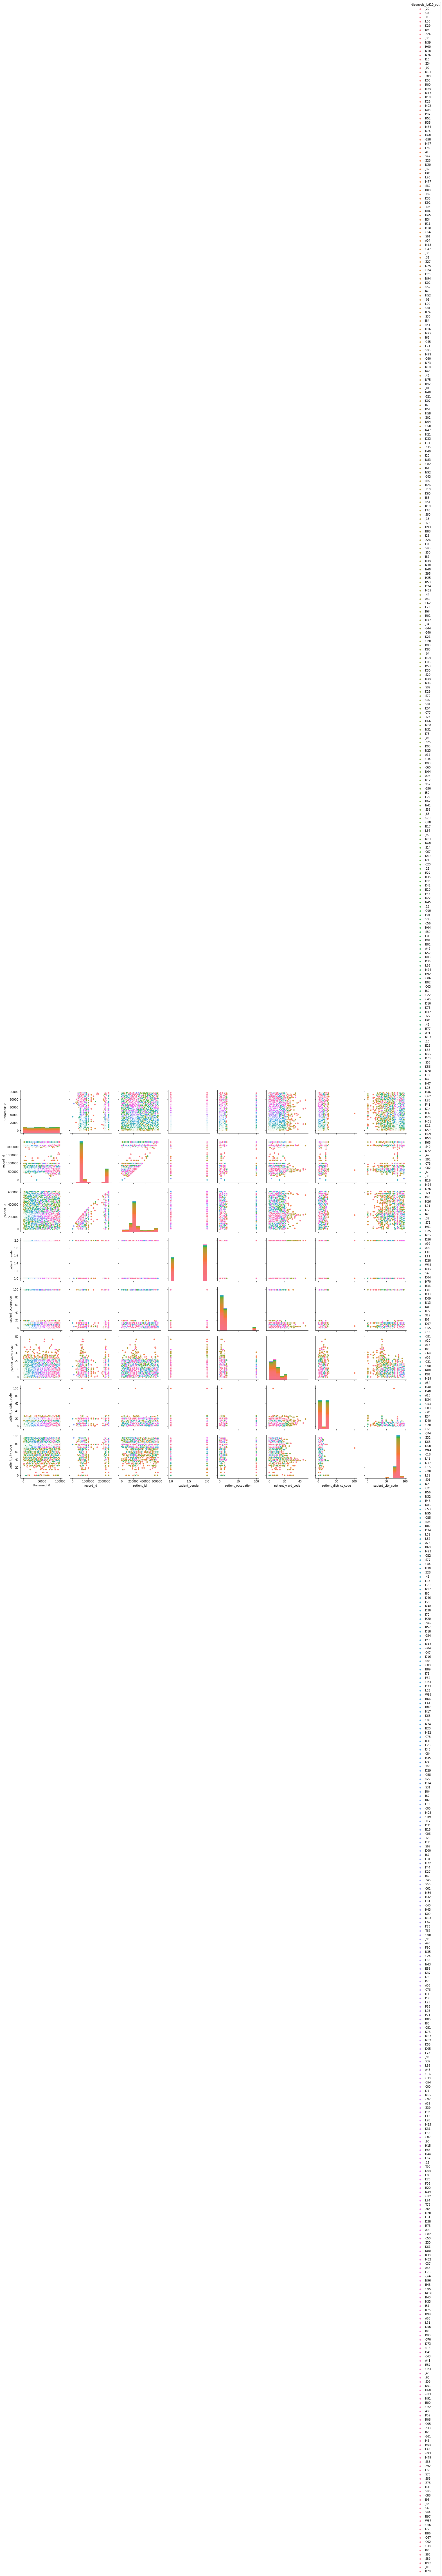

In [6]:
ax = sns.pairplot(data=df, 
             hue='diagnosis_icd10_out'
            )
ax.savefig('diagnosis_icd10_out.png')